In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [3]:
dir_name_train_INTERMITTENT_ASTHMA = 'dataset/train/INTERMITTENT_ASTHMA'
dir_name_train_NORMAL = 'dataset/train/NORMAL'
dir_name_train_SEVERE_PERSISTENT_ASTHMA = 'dataset/train/SEVERE_PERSISTENT_ASTHMA'

In [4]:
def plot_images(item_dir, n):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    plt.figure(figsize=(35, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(1, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.axis('off')

In [5]:
def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['total images'] = len(files)
    data['min width'] = 10**100  # No image will be bigger than that
    data['max width'] = 0
    data['min height'] = 10**100  # No image will be bigger than that
    data['max height'] = 0
    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min width'] = min(width, data['min width'])
        data['max width'] = max(width, data['max width'])
        data['min height'] = min(height, data['min height'])
        data['max height'] = max(height, data['max height'])  
    print("Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))


Trainned data for INTERMITTENT_ASTHMA:

Images in:  dataset/train/INTERMITTENT_ASTHMA
total images:	460
min width:	224
max width:	5623
min height:	224
max height:	4757



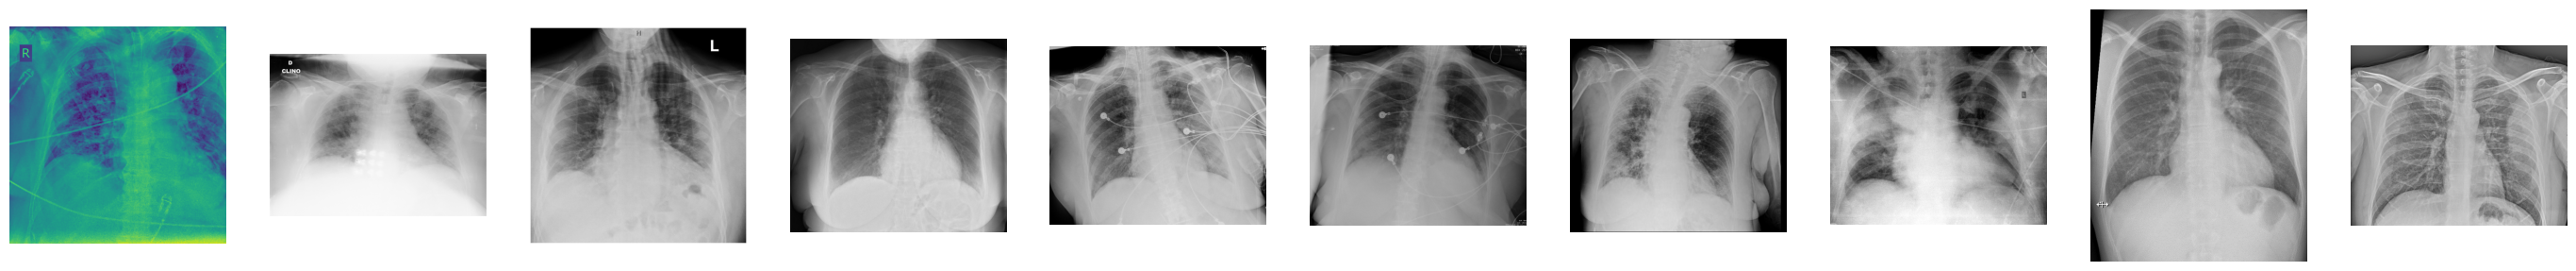

In [6]:
print("")
print("Trainned data for INTERMITTENT_ASTHMA:")
print("")
Images_details(dir_name_train_INTERMITTENT_ASTHMA)
print("")
plot_images(dir_name_train_INTERMITTENT_ASTHMA, 10)


Trainned data for NORMAL:

Images in:  dataset/train/NORMAL
total images:	429
min width:	994
max width:	2890
min height:	747
max height:	2534



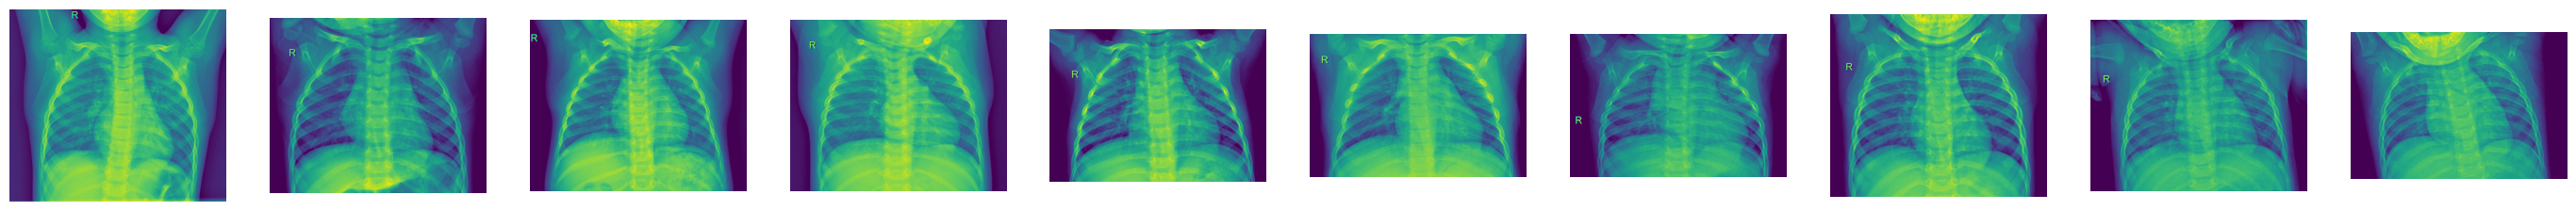

In [7]:
print("")
print("Trainned data for NORMAL:")
print("")
Images_details(dir_name_train_NORMAL)
print("")
plot_images(dir_name_train_NORMAL, 10)


Trainned data for SEVERE_PERSISTENT_ASTHMA:

Images in:  dataset/train/SEVERE_PERSISTENT_ASTHMA
total images:	440
min width:	664
max width:	2064
min height:	392
max height:	1752



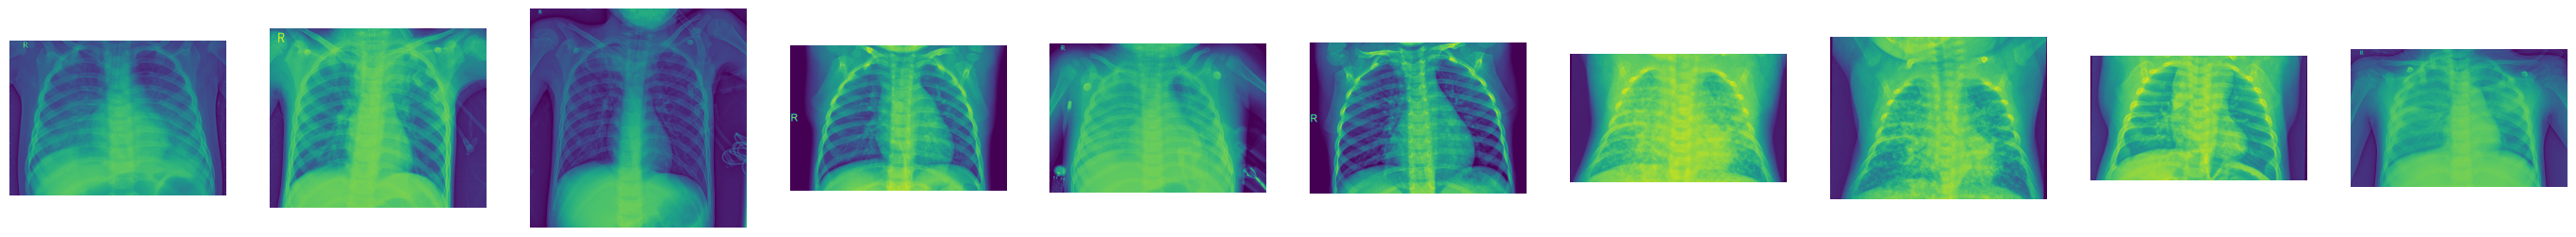

In [9]:
print("")
print("Trainned data for SEVERE_PERSISTENT_ASTHMA:")
print("")
Images_details(dir_name_train_SEVERE_PERSISTENT_ASTHMA)
print("")
plot_images(dir_name_train_SEVERE_PERSISTENT_ASTHMA, 10)

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
training_set=train_datagen.flow_from_directory('dataset/train',target_size=(128,128),batch_size=32,class_mode='categorical')

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('dataset/test',target_size=(128,128),batch_size=32,class_mode='categorical')

In [11]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(92,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(456, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adadelta',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 92)        26588     
                                                                 
 flatten (Flatten)           (None, 342332)            0         
                                                                 
 dense (Dense)               (None, 456)               156103848 
                                                                 
 dense_1 (Dense)             (None, 200)               91400     
                                                        

In [12]:
mc = ModelCheckpoint('vggmodel.h5', monitor = 'accuracy', verbose=1, save_best_only = True)

In [13]:
epochs = 10
batch_size = 32

In [14]:
#### Fitting the model
history = model.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size,
           callbacks=[mc])

Epoch 1/10
41/41 [==============================] - ETA: 0s - loss: 1.0295 - accuracy: 0.5813
Epoch 1: accuracy improved from -inf to 0.58134, saving model to vggmodel.h5
41/41 [==============================] - 50s 1s/step - loss: 1.0295 - accuracy: 0.5813 - val_loss: 0.9854 - val_accuracy: 0.6946
Epoch 2/10
41/41 [==============================] - ETA: 0s - loss: 0.9209 - accuracy: 0.6446
Epoch 2: accuracy improved from 0.58134 to 0.64456, saving model to vggmodel.h5
41/41 [==============================] - 50s 1s/step - loss: 0.9209 - accuracy: 0.6446 - val_loss: 0.9335 - val_accuracy: 0.4233
Epoch 3/10
41/41 [==============================] - ETA: 0s - loss: 0.8475 - accuracy: 0.7124
Epoch 3: accuracy improved from 0.64456 to 0.71241, saving model to vggmodel.h5
41/41 [==============================] - 52s 1s/step - loss: 0.8475 - accuracy: 0.7124 - val_loss: 0.8514 - val_accuracy: 0.6151
Epoch 4/10
41/41 [==============================] - ETA: 0s - loss: 0.7844 - accuracy: 0.7124


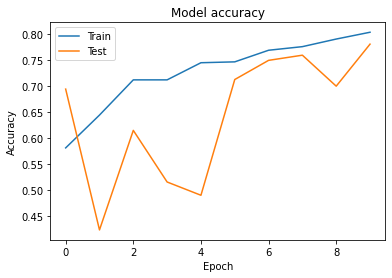

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

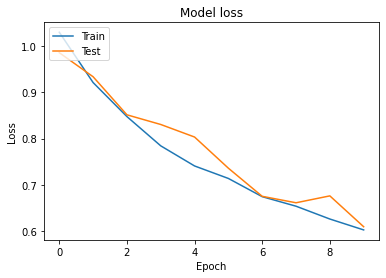

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()